This nb contains the steps to go from the raw data from Survey Monkey to  the count of Terminological errors per system and rater.
(1) Weights and Google evaluations are separated from raw file.
(2) Rows are separated into different files keeping headers, obtaining each rater's complete evaluation of each system.
(3) The segment information of those 17-column sets whose first column is informed as "Yes, there are terminological errors" are extracted together into a different file containing each rater's segment information for those they classified as terminological error segments.
(4) From the full 17-column segment set, the 3-column subsets that are each error report (error, severity, correction) are extracted only if all three columns are informed. The fully-informed error reports are saved into a separate file according to rater and system.
(5) Those files are classified into two separate files containing either Minor or Major errors, which are also counted (per rater and system again)

In [45]:
import pandas as pd

file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

# Select columns from index 0 to 108 (inclusive)
selected_columns = data.iloc[:, 107:3507]

selected_columns.to_csv('bothsystems-data.csv', index=False)

print("Segments' data have been saved to 'bothsystems-data.csv'.")

import pandas as pd

file_path = 'bothsystems-data.csv'# TO GET WEIGHTS DATA ONLY
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 0:1700]

selected_columns.to_csv('Weights-data.csv', index=False)

print("Weights evaluation data have been saved to 'Weights-data.csv'.")

import pandas as pd

file_path = 'bothsystems-data.csv'  # TO GET GOOGLE DATA ONLY
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 1700:3400]

selected_columns.to_csv('Google-data.csv', index=False)

print("Google evaluation data have been saved to 'Google-data.csv'.")

Segments' data have been saved to 'bothsystems-data.csv'.
Weights evaluation data have been saved to 'Weights-data.csv'.
Google evaluation data have been saved to 'Google-data.csv'.


In [46]:
import pandas as pd ### TO SEPARATE SYSTEM'S DATA PER RATER TO RATER-SPECIFIC FILE (PER ROW) ###

file_path = 'Weights-data.csv'
data = pd.read_csv(file_path)

# Extract the header row (row 0) and column titles
header = data.iloc[0]  # First row
column_titles = data.columns  # Column titles

# Iterate over the remaining rows and save each as a new file
for i in range(1, len(data)):
    # Create a new DataFrame for each row, including the header
    row_data = pd.DataFrame([header, data.iloc[i]], columns=column_titles)

    output_file = f'rater_{i}_output-Weights.csv'
    row_data.to_csv(output_file, index=False)
    print(f"File saved: {output_file}")


file_path = 'Google-data.csv'  # SAME WITH GOOGLE
data = pd.read_csv(file_path)

header = data.iloc[0]
column_titles = data.columns

for i in range(1, len(data)):
    row_data = pd.DataFrame([header, data.iloc[i]], columns=column_titles)

    output_file = f'rater_{i}_output-Google.csv'
    row_data.to_csv(output_file, index=False)
    print(f"File saved: {output_file}")


File saved: rater_1_output-Weights.csv
File saved: rater_2_output-Weights.csv
File saved: rater_3_output-Weights.csv
File saved: rater_1_output-Google.csv
File saved: rater_2_output-Google.csv
File saved: rater_3_output-Google.csv


In [47]:
import pandas as pd ### TO EXTRACT ONLY "Yes, there are termin. errors" in row 2, PER RATER PER SYSTEM
### REPEAT WITH EACH RATER-SYSTEM OUTPUT FILE rater_1_output-Weights.csv, rater_1_output-Google.csv etc ###
### REPEAT WITH THE OTHER SYSTEM TOO

df = pd.read_csv('rater_1_output-Weights.csv', header=None)

# Define the category of interest in row index 2 (third row)
target_category = "Yes, there are terminological errors."

# Initialize an empty list to store the selected segments
selected_segments = []
count_selected_segments = 0  # Initialize a counter for the number of selected segments

# Debug: check the first few column headers and row 2 values
print("Column headers and their values in row 2:")
for i in range(0, df.shape[1], 17):  # Check every 17th column (segment starts)
    print(f"Column {i} header: '{df.iloc[0, i]}' -> Row 2 value: '{df.iloc[2, i]}'")

# Iterate through the first column of each segment (row index 2 now)
for segment_start in range(0, df.shape[1], 17):
    # Check the value in row 2 (third row, index 2) of the current segment
    category_value = df.iloc[2, segment_start].strip()  # Remove any leading/trailing spaces
    if category_value == target_category:
        print(f"Found terminological error in segment starting at column {segment_start}.")
        # Select the entire segment (17 columns starting from segment_start)
        segment_data = df.iloc[:, segment_start:segment_start+17]
        selected_segments.append(segment_data)
        count_selected_segments += 1  #Increment the counter when a segment is selected
    else:
        print(f"Segment starting at column {segment_start} does not have the target category.")

# Check if any segments were selected
if selected_segments:
    # Combine all selected segments into a new DataFrame
    selected_df = pd.concat(selected_segments, axis=1, ignore_index=True)

    # Write the selected data to a new CSV file
    selected_df.to_csv('yestermerror_Weights_r1.csv', header=False, index=False)
    print("Filtered segments have been written to 'yestermerror_Weights_r1.csv'")
    print(f"Total number of segments with terminological errors: {count_selected_segments}")
else:
    print("No segments with terminological errors were found.")


Column headers and their values in row 2:
Column 0 header: 'Are there errors in this segment?' -> Row 2 value: 'No, there are no errors at all.'
Column 17 header: 'Are there errors in this segment?.1' -> Row 2 value: 'No, there are no errors at all.'
Column 34 header: 'Are there errors in this segment?.2' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 51 header: 'Are there errors in this segment?.3' -> Row 2 value: 'Yes, there are terminological errors.'
Column 68 header: 'Are there errors in this segment?.4' -> Row 2 value: 'No, there are no errors at all.'
Column 85 header: 'Are there errors in this segment?.5' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 102 header: 'Are there errors in this segment?.6' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 119 header: 'Are there errors in this segment?.7' -> Row 2 value: 'Yes, there are terminological errors.'
Column 136 header: 'Are there 

In [48]:
import pandas as pd ### TO EXTRACT ONLY FULLY-INFORMED ERROR REPORTS FROM ONLY YES, TERM. ERRORS ###
### REPEAT WITH EACH RATER (yestermerror_Weights_r1.csv, yestermerror_Weights_r2.csv, etc.)
### REPEAT with EACH SYSTEM TOO

# Use the segments where the first column identifies terminological errors (we dont know if the error reports inside are fully informed or not)
df = pd.read_csv('yestermerror_Weights_r1.csv', header=None)

# Initialize a list to store the updated segments with fully informed error reports
updated_segments = []
# Initialize a counter to keep track of how many fully informed error reports per segment
count_per_segment = []

# Define the number of error reports (5), and each error report spans 3 columns
num_error_reports = 5

# Iterate through each segment (each 17-column set)
for segment_start in range(0, df.shape[1], 17):
    segment_data = df.iloc[:, segment_start:segment_start+17]  # Select the current segment (17 columns)

    # Initialize a list to store the fully informed error reports for the current segment
    fully_informed_reports = []
    fully_informed_count = 0

    # Iterate through the 5 error reports (each consisting of 3 columns)
    for i in range(num_error_reports):
        # Extract the 3-column subset for the current error report
        error_report = segment_data.iloc[:, 1 + i*3: 4 + i*3]

        # Check if any of the 3 columns contains NaN (missing data)
        if error_report.isna().any().any():  # If there's any NaN value in the subset
            continue  # Skip this error report subset
        else:
            # If all columns are informed (no NaN values), add it to the list
            fully_informed_reports.append(error_report)
            fully_informed_count += 1

    # If there are fully informed reports, append them to the list of updated segments
    if fully_informed_reports:
        # Combine the fully informed error reports for this segment
        updated_segment = pd.concat(fully_informed_reports, axis=1, ignore_index=True)
        updated_segments.append(updated_segment)

    # Append the count of fully informed error reports for this segment
    count_per_segment.append(fully_informed_count)

    # Print the number of fully informed error reports for this segment (combine the info)
    print(f"Segment starting at column {segment_start} or segment {len(count_per_segment)} has {fully_informed_count} fully informed error report(s).")

# Combine all updated segments into a single DataFrame
if updated_segments:
    final_df = pd.concat(updated_segments, axis=1, ignore_index=True)

    # Write the final DataFrame to a new file
    final_df.to_csv('clean-yestermerror_Weights_r1.csv', header=False, index=False)
    print(f"Filtered segments with fully informed error reports have been written to 'clean-yestermerror_Weights_r1.csv'")
else:
    print("No fully informed error reports were found.")

# Calculate the total number of fully informed error reports
total_fully_informed = sum(count_per_segment)
# Calculate the mean and median of fully informed error reports per segment
mean_reports = pd.Series(count_per_segment).mean()
median_reports = pd.Series(count_per_segment).median()

# Print the total, mean, and median
print("\n--- Summary ---")
print(f"Total fully informed 3-part error reports: {total_fully_informed}")
print(f"Mean number of fully informed error reports per segment: {mean_reports:.2f}")
print(f"Median number of fully informed error reports per segment: {median_reports}")


Segment starting at column 0 or segment 1 has 0 fully informed error report(s).
Segment starting at column 17 or segment 2 has 1 fully informed error report(s).
Segment starting at column 34 or segment 3 has 0 fully informed error report(s).
Segment starting at column 51 or segment 4 has 1 fully informed error report(s).
Segment starting at column 68 or segment 5 has 1 fully informed error report(s).
Segment starting at column 85 or segment 6 has 2 fully informed error report(s).
Segment starting at column 102 or segment 7 has 1 fully informed error report(s).
Segment starting at column 119 or segment 8 has 1 fully informed error report(s).
Segment starting at column 136 or segment 9 has 1 fully informed error report(s).
Segment starting at column 153 or segment 10 has 1 fully informed error report(s).
Segment starting at column 170 or segment 11 has 1 fully informed error report(s).
Segment starting at column 187 or segment 12 has 1 fully informed error report(s).
Segment starting at 

In [50]:
### TO CLASSIFY AND COUNT MINOR/MAJOR ERRORS PER SEVERITY (PER RATER AND PER SYSTEM)
import pandas as pd
import numpy as np

file_names = [
    "clean-yestermerror_Google_r1.csv", "clean-yestermerror_Google_r2.csv", "clean-yestermerror_Google_r3.csv",
    "clean-yestermerror_Weights_r1.csv", "clean-yestermerror_Weights_r2.csv", "clean-yestermerror_Weights_r3.csv",
]

#Initialize a dictionary to store counts
error_counts = {}

# Loop through each file and process
for file_name in file_names:
    try:
        df = pd.read_csv(file_name, header=None)
        # Initialize counts for this file
        minor_count = 0
        major_count = 0

        # Loop through columns in sets of 3 (0, 3, 6, ...)
        for i in range(1, df.shape[1], 3):  # Middle column of each set of 3
            severity_column = df.iloc[:, i].astype(str).str.strip()  # Convert to string and strip whitespace

            # Count occurrences of "minor" and "major"
            minor_count += severity_column.str.contains("minor", case=False, na=False).sum()
            major_count += severity_column.str.contains("major", case=False, na=False).sum()

        # Store counts in the dictionary
        error_counts[file_name] = {"Minor": minor_count, "Major": major_count}

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print("Error counts per file:")
minor_values = []
major_values = []

for file, counts in error_counts.items():
    print(f"{file}: Minor = {counts['Minor']}, Major = {counts['Major']}")
    minor_values.append(counts["Minor"])
    major_values.append(counts["Major"])

# Descriptive statistics
minor_mean = np.mean(minor_values)
minor_std = np.std(minor_values)
minor_median = np.median(minor_values)

major_mean = np.mean(major_values)
major_std = np.std(major_values)
major_median = np.median(major_values)

print("\nDescriptive Statistics:")
print(f"Mean Minor Errors: {minor_mean:.2f}, Standard Deviation: {minor_std:.2f}, Median: {minor_median:.2f}")
print(f"Mean Major Errors: {major_mean:.2f}, Standard Deviation: {major_std:.2f}, Median: {major_median:.2f}")


Error counts per file:
clean-yestermerror_Google_r1.csv: Minor = 9, Major = 7
clean-yestermerror_Google_r2.csv: Minor = 36, Major = 59
clean-yestermerror_Google_r3.csv: Minor = 9, Major = 14
clean-yestermerror_Weights_r1.csv: Minor = 10, Major = 19
clean-yestermerror_Weights_r2.csv: Minor = 50, Major = 97
clean-yestermerror_Weights_r3.csv: Minor = 12, Major = 41

Descriptive Statistics:
Mean Minor Errors: 21.00, Standard Deviation: 16.10, Median: 11.00
Mean Major Errors: 39.50, Standard Deviation: 31.13, Median: 30.00


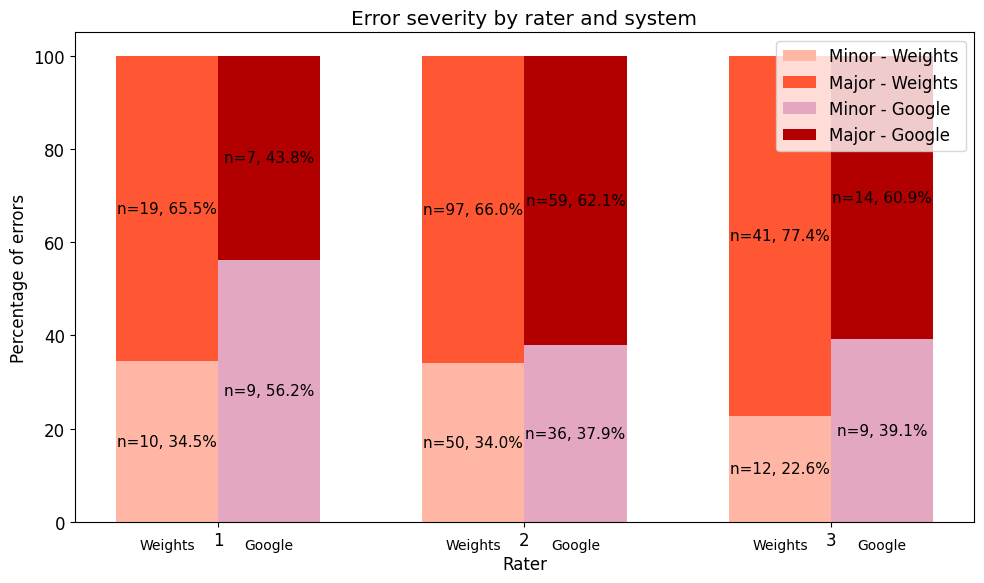

In [51]:
### TO GENERATE MINOR/MAJOR PLOT PER RATER AND SYSTEM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File names
file_names = [
    "clean-yestermerror_Google_r1.csv", "clean-yestermerror_Google_r2.csv", "clean-yestermerror_Google_r3.csv",
    "clean-yestermerror_Weights_r1.csv", "clean-yestermerror_Weights_r2.csv", "clean-yestermerror_Weights_r3.csv",
]

# Initialize a dictionary to store counts
error_counts = {}

# Loop through each file and process
for file_name in file_names:
    try:
        df = pd.read_csv(file_name, header=None)

        # Initialize counts for this file
        minor_count = 0
        major_count = 0

        # Loop through columns in sets of 3 (0, 3, 6, ...)
        for i in range(1, df.shape[1], 3):  # Middle column of each set of 3
            severity_column = df.iloc[:, i].astype(str).str.strip()  # Convert to string and strip whitespace

            # Count occurrences of "minor" and "major"
            minor_count += severity_column.str.contains("minor", case=False, na=False).sum()
            major_count += severity_column.str.contains("major", case=False, na=False).sum()

        # Store the counts in the dictionary
        error_counts[file_name] = {"Minor": minor_count, "Major": major_count}

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Prepare data for plotting
systems = ["Weights", "Google"]
raters = ["1", "2", "3"]
data = {
    "Rater": [],
    "System": [],
    "Minor": [],
    "Major": [],
    "Minor_Count": [],
    "Major_Count": []
}

for file, counts in error_counts.items():
    for system in systems:
        if system in file:
            for rater in raters:
                if rater in file:
                    data["Rater"].append(rater)
                    data["System"].append(system)
                    total_errors = counts["Minor"] + counts["Major"]
                    data["Minor"].append(counts["Minor"] / total_errors * 100)
                    data["Major"].append(counts["Major"] / total_errors * 100)
                    data["Minor_Count"].append(counts["Minor"])
                    data["Major_Count"].append(counts["Major"])

# Convert the data into a DataFrame for plotting
data_df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.50
positions = np.arange(len(raters)) * (len(systems) * bar_width + bar_width)

system_labels = []
x_positions_all = []

for idx, system in enumerate(systems):
    minor_values = data_df[data_df["System"] == system]["Minor"].values
    major_values = data_df[data_df["System"] == system]["Major"].values
    minor_counts = data_df[data_df["System"] == system]["Minor_Count"].values
    major_counts = data_df[data_df["System"] == system]["Major_Count"].values

    # Calculate x positions for each system's bars
    x_positions = positions + idx * bar_width
    x_positions_all.extend(x_positions)
    system_labels.extend([system] * len(x_positions))

    bars_minor = ax.bar(
        x_positions,
        minor_values,
        width=bar_width,
        label=f"Minor - {system}",
        color='#FFB6A5' if system == 'Weights' else '#E4A7C2'
    )
    bars_major = ax.bar(
        x_positions,
        major_values,
        bottom=minor_values,  # Stack on top of minor values
        width=bar_width,
        label=f"Major - {system}",
        color='#FF5733' if system == 'Weights' else '#B20000'
    )

    # Add labels to the bars
    ax.set_xlabel("Rater", fontsize=12)
    ax.set_ylabel("Percentage of errors", fontsize=12)
    ax.set_title("Error Severity by annotator and system", fontsize=14)



    for bar_minor, bar_major, minor_val, major_val, minor_cnt, major_cnt, rater in zip(
            bars_minor, bars_major, minor_values, major_values, minor_counts, major_counts, raters):
        ax.text(
            bar_minor.get_x() + bar_minor.get_width() / 2,  # Centered on the bar
            bar_minor.get_height() / 2,  # Halfway up the bar
            f"n={minor_cnt}, {minor_val:.1f}%",
            ha='center', va='center', fontsize=11, color='black'
        )
        ax.text(
            bar_major.get_x() + bar_major.get_width() / 2,  # Centered on the bar
            bar_major.get_y() + bar_major.get_height() / 2,  # Halfway up the stacked section
            f"n={major_cnt}, {major_val:.1f}%",
            ha='center', va='center', fontsize=11, color='black'
        )
        plt.rcParams.update({'font.size': 12})

ax.set_xticks(positions + (len(systems) - 1) * bar_width / 2)
ax.set_xticklabels(raters)
ax.set_xlabel("Rater")
ax.set_ylabel("Percentage of errors")
ax.set_title("Error severity by rater and system")
ax.legend()

# System labels below the x-axis
for x_pos, system_label in zip(x_positions_all, system_labels):
    ax.text(x_pos, -5, system_label, ha='center', va='center', fontsize=10, color='black', transform=ax.transData)

plt.tight_layout()

# Save as PNG
fig.savefig("severity-systems-raters-comparison.png", dpi=300, bbox_inches="tight")

plt.show()

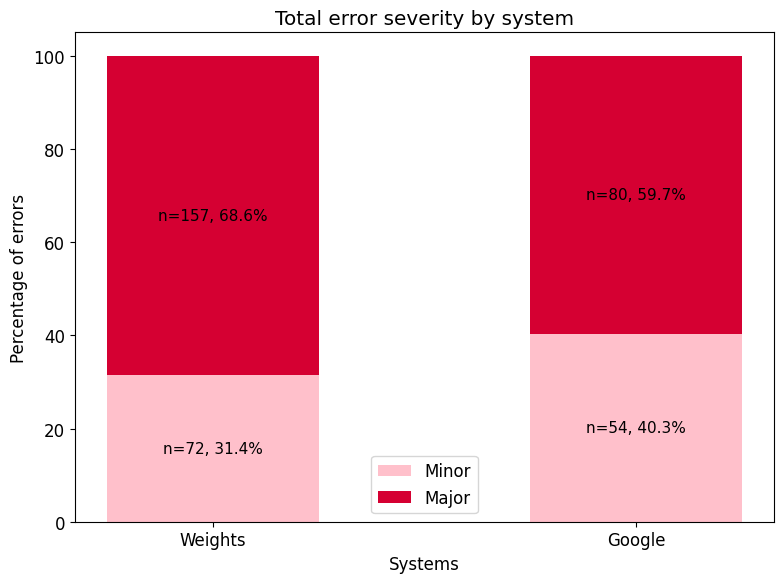

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_names = [
    "clean-yestermerror_Google_r1.csv", "clean-yestermerror_Google_r2.csv", "clean-yestermerror_Google_r3.csv",
    "clean-yestermerror_Weights_r1.csv", "clean-yestermerror_Weights_r2.csv", "clean-yestermerror_Weights_r3.csv",
]

# Initialize a dictionary to store counts
error_counts = {}

# Loop through each file and process
for file_name in file_names:
    try:
        df = pd.read_csv(file_name, header=None)

        # Initialize counts for this file
        minor_count = 0
        major_count = 0

        # Loop through columns in sets of 3 (0, 3, 6, ...)
        for i in range(1, df.shape[1], 3):  # Middle column of each set of 3
            severity_column = df.iloc[:, i].astype(str).str.strip()  # Convert to string and strip whitespace

            # Count occurrences of "minor" and "major"
            minor_count += severity_column.str.contains("minor", case=False, na=False).sum()
            major_count += severity_column.str.contains("major", case=False, na=False).sum()

        # Store the counts in the dictionary
        error_counts[file_name] = {"Minor": minor_count, "Major": major_count}

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Prepare data for plotting
systems = ["Google", "Weights"]
summary_data = {"System": [], "Minor_Count": [], "Major_Count": []}

for file, counts in error_counts.items():
    for system in systems:
        if system in file:
            if system not in summary_data["System"]:
                summary_data["System"].append(system)
                summary_data["Minor_Count"].append(0)
                summary_data["Major_Count"].append(0)
            idx = summary_data["System"].index(system)
            summary_data["Minor_Count"][idx] += counts["Minor"]
            summary_data["Major_Count"][idx] += counts["Major"]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5

# Reorder data to put Weights before Google
# Find indices to reorder summary_data
weights_idx = summary_data["System"].index("Weights")
google_idx = summary_data["System"].index("Google")

# Rearrange data to match the desired order
total_minor = [summary_data["Minor_Count"][weights_idx], summary_data["Minor_Count"][google_idx]]
total_major = [summary_data["Major_Count"][weights_idx], summary_data["Major_Count"][google_idx]]
total_errors = [minor + major for minor, major in zip(total_minor, total_major)]

# Adjust x_positions to match the reordered data
x_positions = [0, 1]  # Explicitly set positions: Weights = 0, Google = 1

# Stacked bar chart
bars_minor = ax.bar(
    x_positions,
    [minor / total * 100 for minor, total in zip(total_minor, total_errors)],
    width=bar_width,
    label="Minor",
    color='pink'
)
bars_major = ax.bar(
    x_positions,
    [major / total * 100 for major, total in zip(total_major, total_errors)],
    bottom=[minor / total * 100 for minor, total in zip(total_minor, total_errors)],
    width=bar_width,
    label="Major",
    color='#D50032'
)

# Add labels to the bars
for bar_minor, bar_major, minor, major, total, system in zip(
        bars_minor, bars_major, total_minor, total_major, total_errors, ["Weights", "Google"]):
    ax.text(
        bar_minor.get_x() + bar_minor.get_width() / 2,  # Centered on the bar
        bar_minor.get_height() / 2,  # Halfway up the bar
        f"n={minor}, {minor / total * 100:.1f}%",
        ha='center', va='center', fontsize=11, color='black'
    )
    ax.text(
        bar_major.get_x() + bar_major.get_width() / 2,  # Centered on the bar
        bar_major.get_y() + bar_major.get_height() / 2,  # Halfway up the stacked section
        f"n={major}, {major / total * 100:.1f}%",
        ha='center', va='center', fontsize=11, color='black'
    )

ax.set_xticks(x_positions)
ax.set_xticklabels(["Weights", "Google"])
ax.set_xlabel("Systems")
ax.set_ylabel("Percentage of errors")
ax.set_title("Total error severity by system")
ax.legend()

plt.tight_layout()

# Save as PNG
fig.savefig("severity-systems-comparison.png", dpi=300, bbox_inches="tight")

plt.show()



In [53]:
### JUST TO CHECK
import pandas as pd

file_path = 'yestermerror_Google_r3.csv'

data = pd.read_csv(file_path)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data)


   Are there errors in this segment?.102  \
0                               Response   
1  Yes, there are terminological errors.   

  Error 1: Copy the erroneous expression. (Crtl+C, Ctrl+V).102  \
0                                Open-Ended Response             
1                                    somewhat bitter             

  Error 1: Select the severity of the error..102  \
0                                       Response   
1                                          Minor   

  Error 1: Please provide the correct expression that should replace the error..102  \
0                                Open-Ended Response                                  
1                                   slightly bitter                                   

  Error 2: Copy the erroneous expression..102  \
0                         Open-Ended Response   
1                                         NaN   

  Error 2: Select the severity of the error..102  \
0                                       Response 

In [ ]:
file_path = 'rater_3_output-Weights.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.tail())

  Are there errors in this segment?  \
0                          Response   
1                               NaN   

  Error 1: Copy the erroneous expression. (Crtl+C, Ctrl+V)  \
0                                Open-Ended Response         
1                                                NaN         

  Error 1: Select the severity of the error.  \
0                                   Response   
1                                        NaN   

  Error 1: Please provide the correct expression that should replace the error.  \
0                                Open-Ended Response                              
1                                                NaN                              

  Error 2: Copy the erroneous expression.  \
0                     Open-Ended Response   
1                                     NaN   

  Error 2: Select the severity of the error.  \
0                                   Response   
1                                        NaN   

  Error 2: Please p